# Training ML Models

In this section an ML-model will be trained in order to be able to predict student droput or academic success.

We need to use models for multi-class classification. Why? Because we want to predict if the student is a Dropout, Graduate, Enrolled. It cannot be classified to 2 categories (https://machinelearningmastery.com/types-of-classification-in-machine-learning/). 

## Imports

In [31]:
import importnb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [32]:
with importnb.Notebook():
    from Data_Cleanup import df_filtered

df_filtered.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Mother's qualification,Admission grade,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
0,1,17,5,1,1,19,127.3,1,0,1,...,0,0,0,0.000000,0,0,0,0.000000,1.74,0
1,1,15,1,1,1,1,142.5,1,0,0,...,6,6,6,14.000000,6,6,6,13.666667,0.79,1
2,1,1,5,1,1,37,124.8,1,0,0,...,6,0,0,0.000000,6,0,0,0.000000,1.74,0
3,1,17,2,1,1,38,119.6,1,0,1,...,6,8,6,13.428571,6,10,5,12.400000,-3.12,1
4,2,39,1,0,1,37,141.5,0,0,1,...,6,9,5,12.333333,6,6,6,13.000000,0.79,1


# Define Train and Test Data

In [33]:
X = df_filtered.drop('Target', axis = 1)
y = df_filtered['Target']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

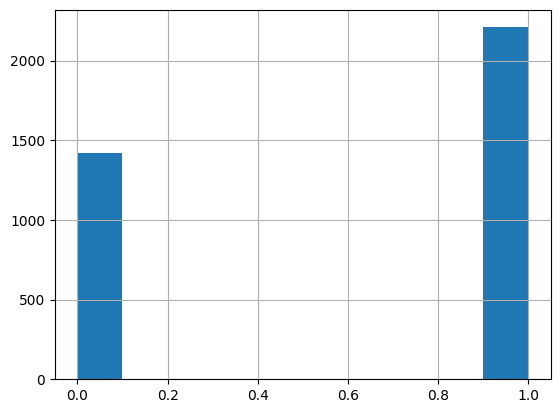

In [35]:
df_filtered["Target"].hist()
plt.show()

# 1. Lineare Regression

#### 1.1 Training the Model

In [36]:
model_linReg = LinearRegression()

model_linReg.fit(X_train, y_train)

pred_dropout = model_linReg.predict(X_test)

#### 1.2 Plotting the Model

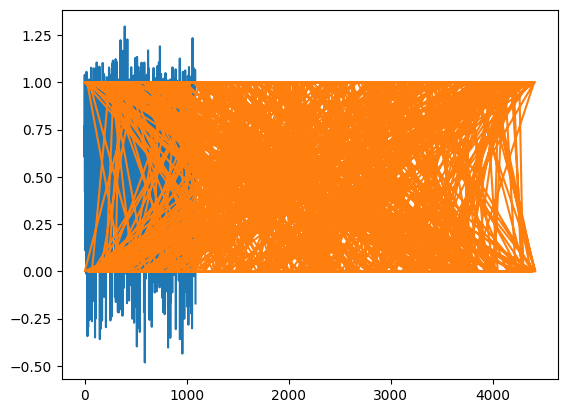

In [37]:
plt.plot(model_linReg.predict(X_test))
plt.plot(y_test)
plt.show()

#### 1.3 Evaluating the Model

In [38]:
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, pred_dropout))
print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test, pred_dropout))
print('Coefficient of Determination (R2): ', model_linReg.score(X_test, y_test))


Mean Absolute Error (MAE):  0.2123624047417464
Mean Squared Error (MSE):  0.08446105757541254
Coefficient of Determination (R2):  0.6432011475051088


# 2. kNN 

In [39]:
model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred_knn = model_knn.predict(X_test)

In [41]:
grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [42]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [43]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [44]:
g_res.best_score_

0.8744588744588745

In [45]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [46]:
model_knn_tuned = KNeighborsClassifier(n_neighbors = 7, weights = 'distance',metric = 'manhattan')
model_knn_tuned.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [47]:
y_pred_knn_tuned= model_knn_tuned.predict(X_test)

# 3. Random forest

In [48]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_pred_rf = model_rf.predict(X_test)

In [50]:
param_grid_random_forest = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9, None], 
    'max_leaf_nodes': [3, 6, 9, None], 
} 

In [51]:
grid_search_random_forest = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_random_forest)
grid_search_random_forest.fit(X_train, y_train)
print(grid_search_random_forest.best_estimator_)
print(grid_search_random_forest.best_params_)
print(grid_search_random_forest.best_score_)

RandomForestClassifier(max_depth=6, max_features='log2')
{'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': None, 'n_estimators': 100}
0.9016127036183346


In [52]:
model_rf_tuned = RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=None, n_estimators=150)

In [53]:
model_rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = model_rf_tuned.predict(X_test)

# 4. Decision Trees

In [54]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

In [55]:
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

g = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

g.fit(X_train,y_train)

cls_params = g.best_params_
cls_params

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 7,
 'min_samples_split': 2}

In [56]:
model_dt_tuned = g.best_estimator_
y_pred_dt_tuned = model_dt_tuned.predict(X_test)


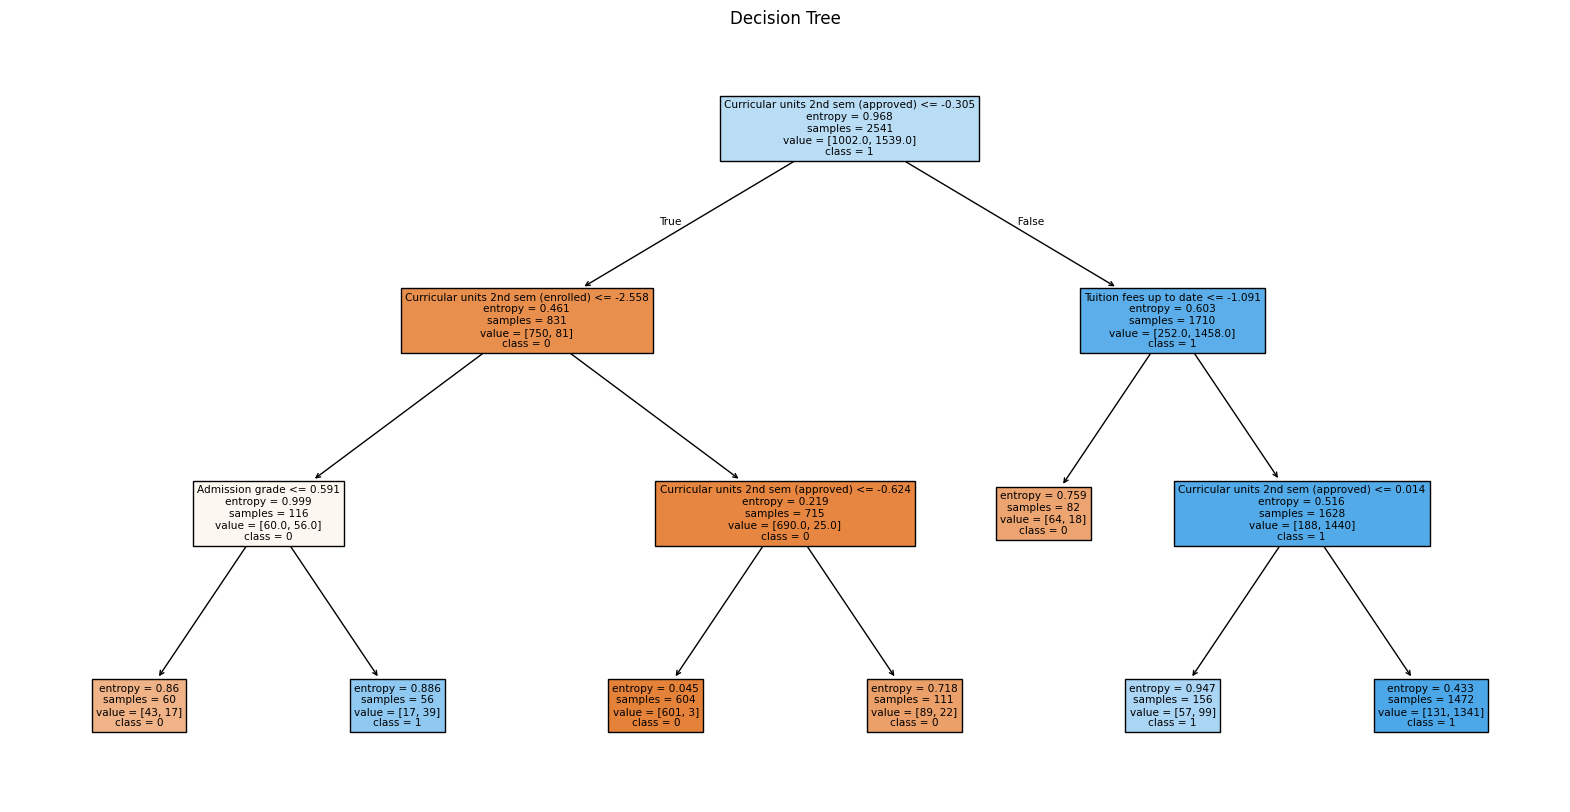

In [57]:
class_names = list(map(str, model_dt_tuned.classes_))

plt.figure(figsize=(20,10))
plot_tree(model_dt_tuned, filled=True, feature_names=df_filtered.columns[:-1], class_names=class_names)
plt.title('Decision Tree')
plt.show()

# 5. Naive Bayes

In [58]:
model_gb = GaussianNB()
model_gb.fit(X_train, y_train)

GaussianNB()

In [59]:
y_pred_gb = model_gb.predict(X_test)